Arima : Autoregressive Integrated Moving Averages
* Visualize Time Series Data
* Make the time sets data stationary
* Plot the correlation and Autocorrelation Charts
* Construct the Arima Model or Seasonal Arima based on the data
* Use the model to make predictions

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df=pd.read_csv('/kaggle/input/perrin-freres-monthly-champagne-sales/perrin-freres-monthly-champagne.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


Cleaning the data:
Chaning the column names

In [10]:
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [11]:
df.isna().sum()

Month    1
Sales    2
dtype: int64

In [12]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [13]:
df.drop(106,axis=0,inplace=True)

In [14]:
df.drop(105,axis=0,inplace=True)
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


Convert Month into Datetime

In [15]:
df['Month']=pd.to_datetime(df['Month'])
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


2. Vissualize the data

<Axes: >

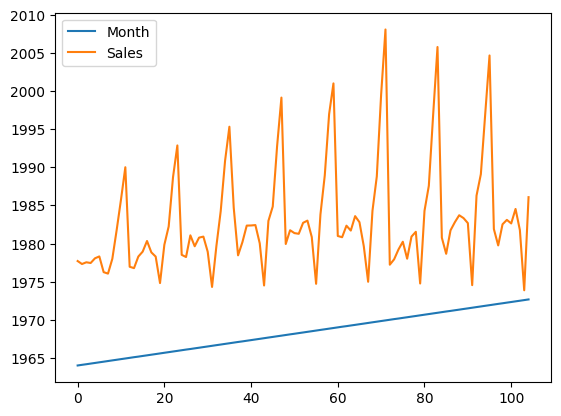

In [16]:
df.plot()

In [17]:
# Testing if data is Stationary
from statsmodels.tsa.stattools import adfuller
test = adfuller(df['Sales'])

In [18]:
# H0: It is non stationary
# H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test statistic', 'p-value', '#Lags used','Number of Observations used']
    for value, label in zip(result,labels):
        print(label+ ':'+str(value))
    if result[1] <= 0.05:
        print("Evidence is strong agains Null Hypo(H0), reject null hypotheses data has no unit root and is stationary")
    else:
        print("Evidence is weak against Null hype, TS has a unit root, indicates data is non-stationary")
            
adfuller_test(df['Sales'])

ADF Test statistic:-1.8335930563276215
p-value:0.36391577166024586
#Lags used:11
Number of Observations used:93
Evidence is weak against Null hype, TS has a unit root, indicates data is non-stationary


Differencing

In [19]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)
df['Seasonal First Difference'] = df['Sales']-df['Sales'].shift(12)
df.head(14)

,Month,Sales,Sales First Difference,Seasonal First Difference
0,1964-01-01,2815.0,NaN,NaN
1,1964-02-01,2672.0,-143.0,NaN
2,1964-03-01,2755.0,83.0,NaN
3,1964-04-01,2721.0,-34.0,NaN
4,1964-05-01,2946.0,225.0,NaN
5,1964-06-01,3036.0,90.0,NaN
6,1964-07-01,2282.0,-754.0,NaN
7,1964-08-01,2212.0,-70.0,NaN
8,1964-09-01,2922.0,710.0,NaN
9,1964-10-01,4301.0,1379.0,NaN


Here data is seasonal and shifting one will not help much(its really helpful when non-seasonal data), hence shifting to 12 is done and now testing the data with dickey fuller test

In [20]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test statistic:-7.626619157213166
p-value:2.0605796968136632e-11
#Lags used:0
Number of Observations used:92
Evidence is strong agains Null Hypo(H0), reject null hypotheses data has no unit root and is stationary


So we are REJECTING null hypothesis and accepting Alternate Hypothesis(H1)

<Axes: >

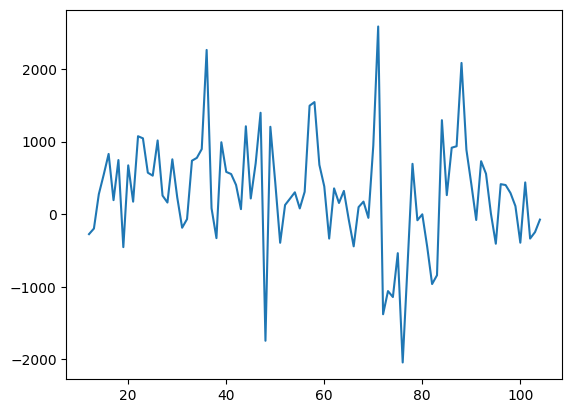

In [21]:
df['Seasonal First Difference'].plot()

Now from the plot, the data looks almost stationary

Auto Regressive Model is a representation of a type of random process; it can be used to describe certain time-varying processes in nature, economics, behavior, etc. The autoregressive model specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term); thus the model is in the form of a stochastic difference equation (or recurrence relation) which should not be confused with a differential equation. 

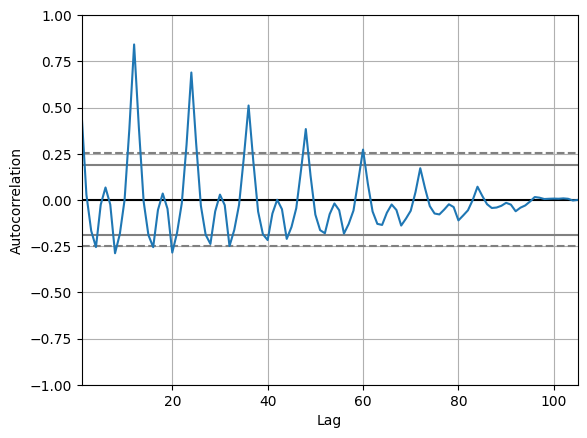

In [22]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

Autocorrelation and Partial Autocorrelation:
Identification of an AR model is often best done with the PACF.
* For an AR model, the theoritical PACF "shuts off" past the order of the model, means autocorrelation are equal to 0 beyond that point. 
* In another way, the number of non-zeo partial autocorrelation gives the order of the AR model, we mean the most extreme kag of x that is used as a predictor

Identification of an MA model is often best done with the ACF rather than the PACF.
* For an MA model, the theoritical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model

p,d,q should be given
p AR model lags
d differencing
q MA lags


In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

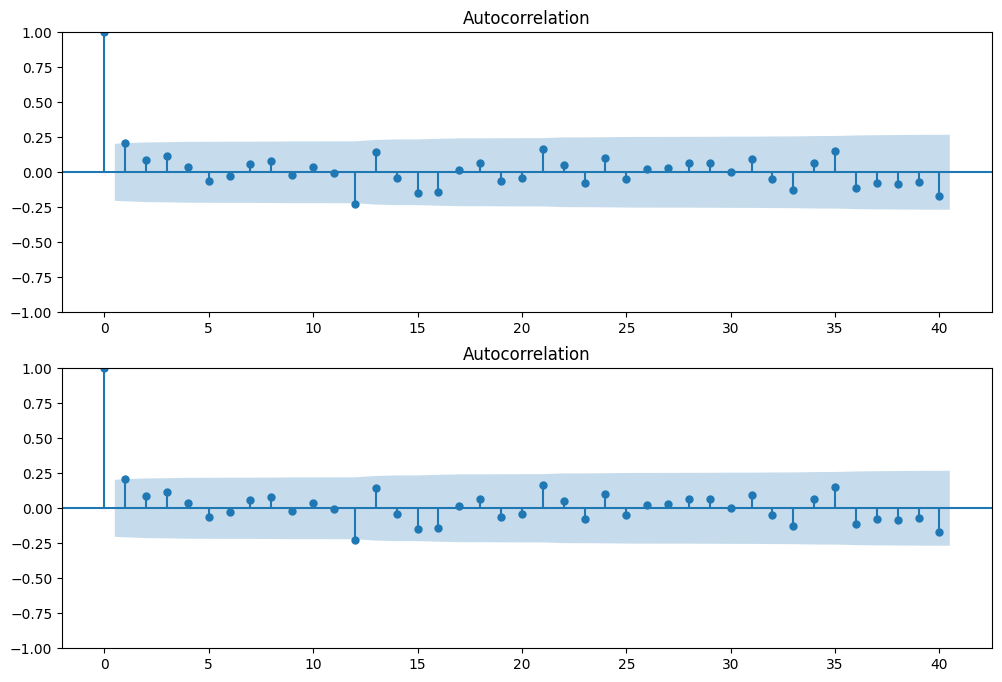

In [24]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

for non seasonal data:
here p=1, d=1 (we shifted only 1 value)
q= 0 or 1

In [25]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Thu, 17 Oct 2024   AIC                           1911.627
Time:                        11:30:12   BIC                           1919.560
Sample:                             0   HQIC                          1914.841
                                - 105                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.001      0.000       0.232       0.677
ma.L1         -0.9667      0.056    -17.329      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.472      0.000    4.02e+06    6.44e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Exact way to do is stated below :


In [26]:
import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(df['Sales'], order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07295D+00    |proj g|=  4.80911D-02

At iterate    5    f=  7.04942D+00    |proj g|=  1.53381D-02


 This problem is unconstrained.



At iterate   10    f=  7.04713D+00    |proj g|=  2.99458D-04

At iterate   15    f=  7.04708D+00    |proj g|=  5.05912D-03

At iterate   20    f=  7.04413D+00    |proj g|=  1.18437D-02

At iterate   25    f=  7.03252D+00    |proj g|=  1.05983D-03

At iterate   30    f=  7.03240D+00    |proj g|=  5.98875D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     34      1     0     0   1.545D-05   7.032D+00
  F =   7.0324006467370035     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<Axes: >

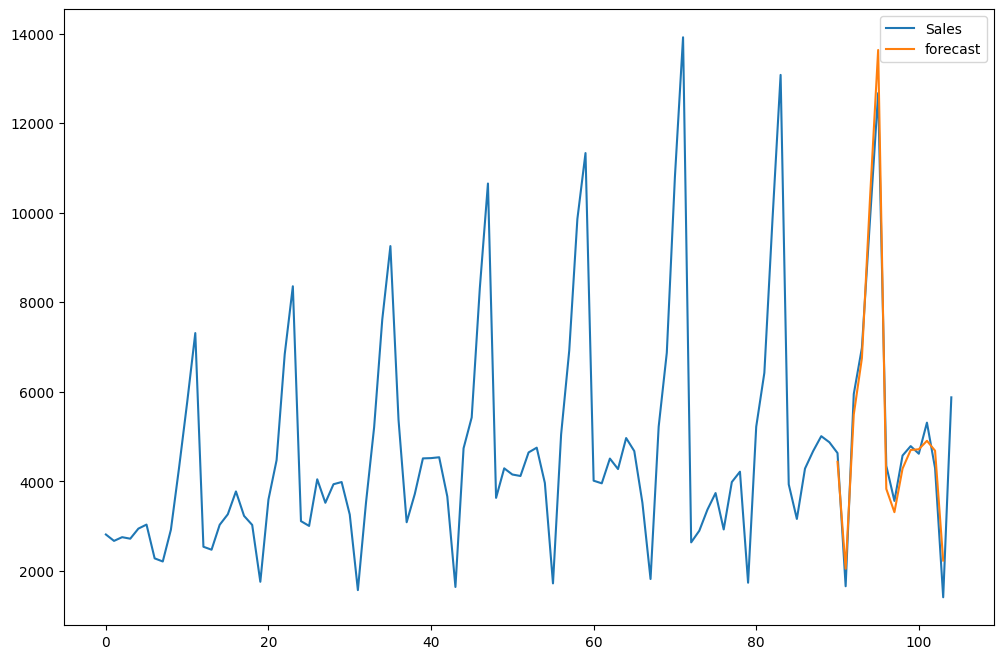

In [27]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [37]:
df.index = pd.to_datetime(df.index)

In [38]:
from pandas.tseries.offsets import DateOffset
import pandas as pd

from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0, 24)]
future_dataset_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_dataset_df.tail()

,Month,Sales,Sales First Difference,Seasonal First Difference,forecast
1971-08-01 00:00:00.000000104,NaN,NaN,NaN,NaN,NaN
1971-09-01 00:00:00.000000104,NaN,NaN,NaN,NaN,NaN
1971-10-01 00:00:00.000000104,NaN,NaN,NaN,NaN,NaN
1971-11-01 00:00:00.000000104,NaN,NaN,NaN,NaN,NaN
1971-12-01 00:00:00.000000104,NaN,NaN,NaN,NaN,NaN


/tmp/ipykernel_30/766989067.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_dataset_df])


<Axes: >

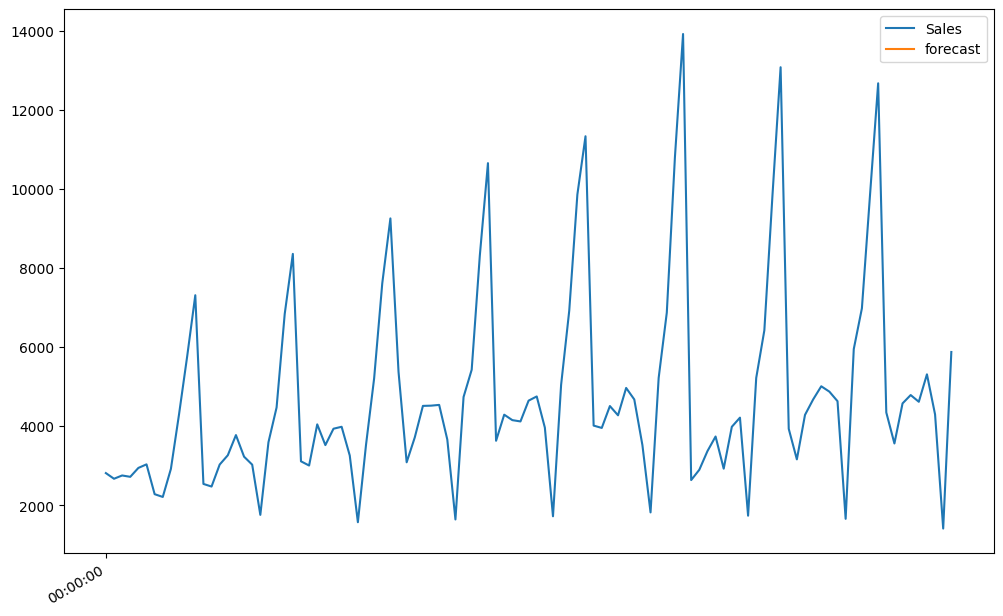

In [39]:
future_df=pd.concat([df,future_dataset_df])
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic=True)
future_df[['Sales','forecast']].plot(figsize=(12,8))